<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/cnn_models_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Dropout, Input, BatchNormalization, concatenate, ZeroPadding2D, add
from tensorflow.keras.layers import Conv2D,MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

In [ ]:
# AlexNet
model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(224,224,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)      

In [ ]:
# VGG16
model = Sequential()
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(224,224,3),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 128)     49280     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
# GoogLeNet / InceptionV1
def conv2d_bn(x, nb_filter, kernel_size, padding='same', strides=(1,1)):
    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, activation='relu')(x)
    x = BatchNormalization(axis=3)(x)
    return x

    # or 
    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, activation=None)(x)
    x = BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    return x

    # or
    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, activation=None)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation(tf.keras.activations.relu)(x) 
    return x
 
def inception(x,nb_filter):
    branch1x1 = conv2d_bn(x, nb_filter,(1,1), padding='same', strides=(1,1))
 
    branch3x3 = conv2d_bn(x, nb_filter,(1,1), padding='same',strides=(1,1))
    branch3x3 = conv2d_bn(branch3x3, nb_filter,(3,3), padding='same', strides=(1,1))
 
    branch5x5 = conv2d_bn(x,nb_filter, (1,1), padding='same', strides=(1,1))
    branch5x5 = conv2d_bn(branch5x5, nb_filter, (5,5), padding='same', strides=(1,1))
 
    branchpool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
    branchpool = conv2d_bn(branchpool, nb_filter,(1,1), padding='same', strides=(1,1))
 
    x = concatenate([branch1x1, branch3x3, branch5x5, branchpool],axis=3)
 
    return x
 
inpt = Input(shape=(224,224,3))
x = conv2d_bn(inpt, 64, (7,7), strides=(2,2), padding='same')
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = conv2d_bn(x, 192, (3,3), strides=(1,1), padding='same')
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x,64)
x = inception(x,120)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x,128)
x = inception(x,128)
x = inception(x,128)
x = inception(x,132)
x = inception(x,208)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x,208)
x = inception(x,256)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='softmax')(x)
model = Model(inpt, x)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d_23[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 56, 56, 64)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

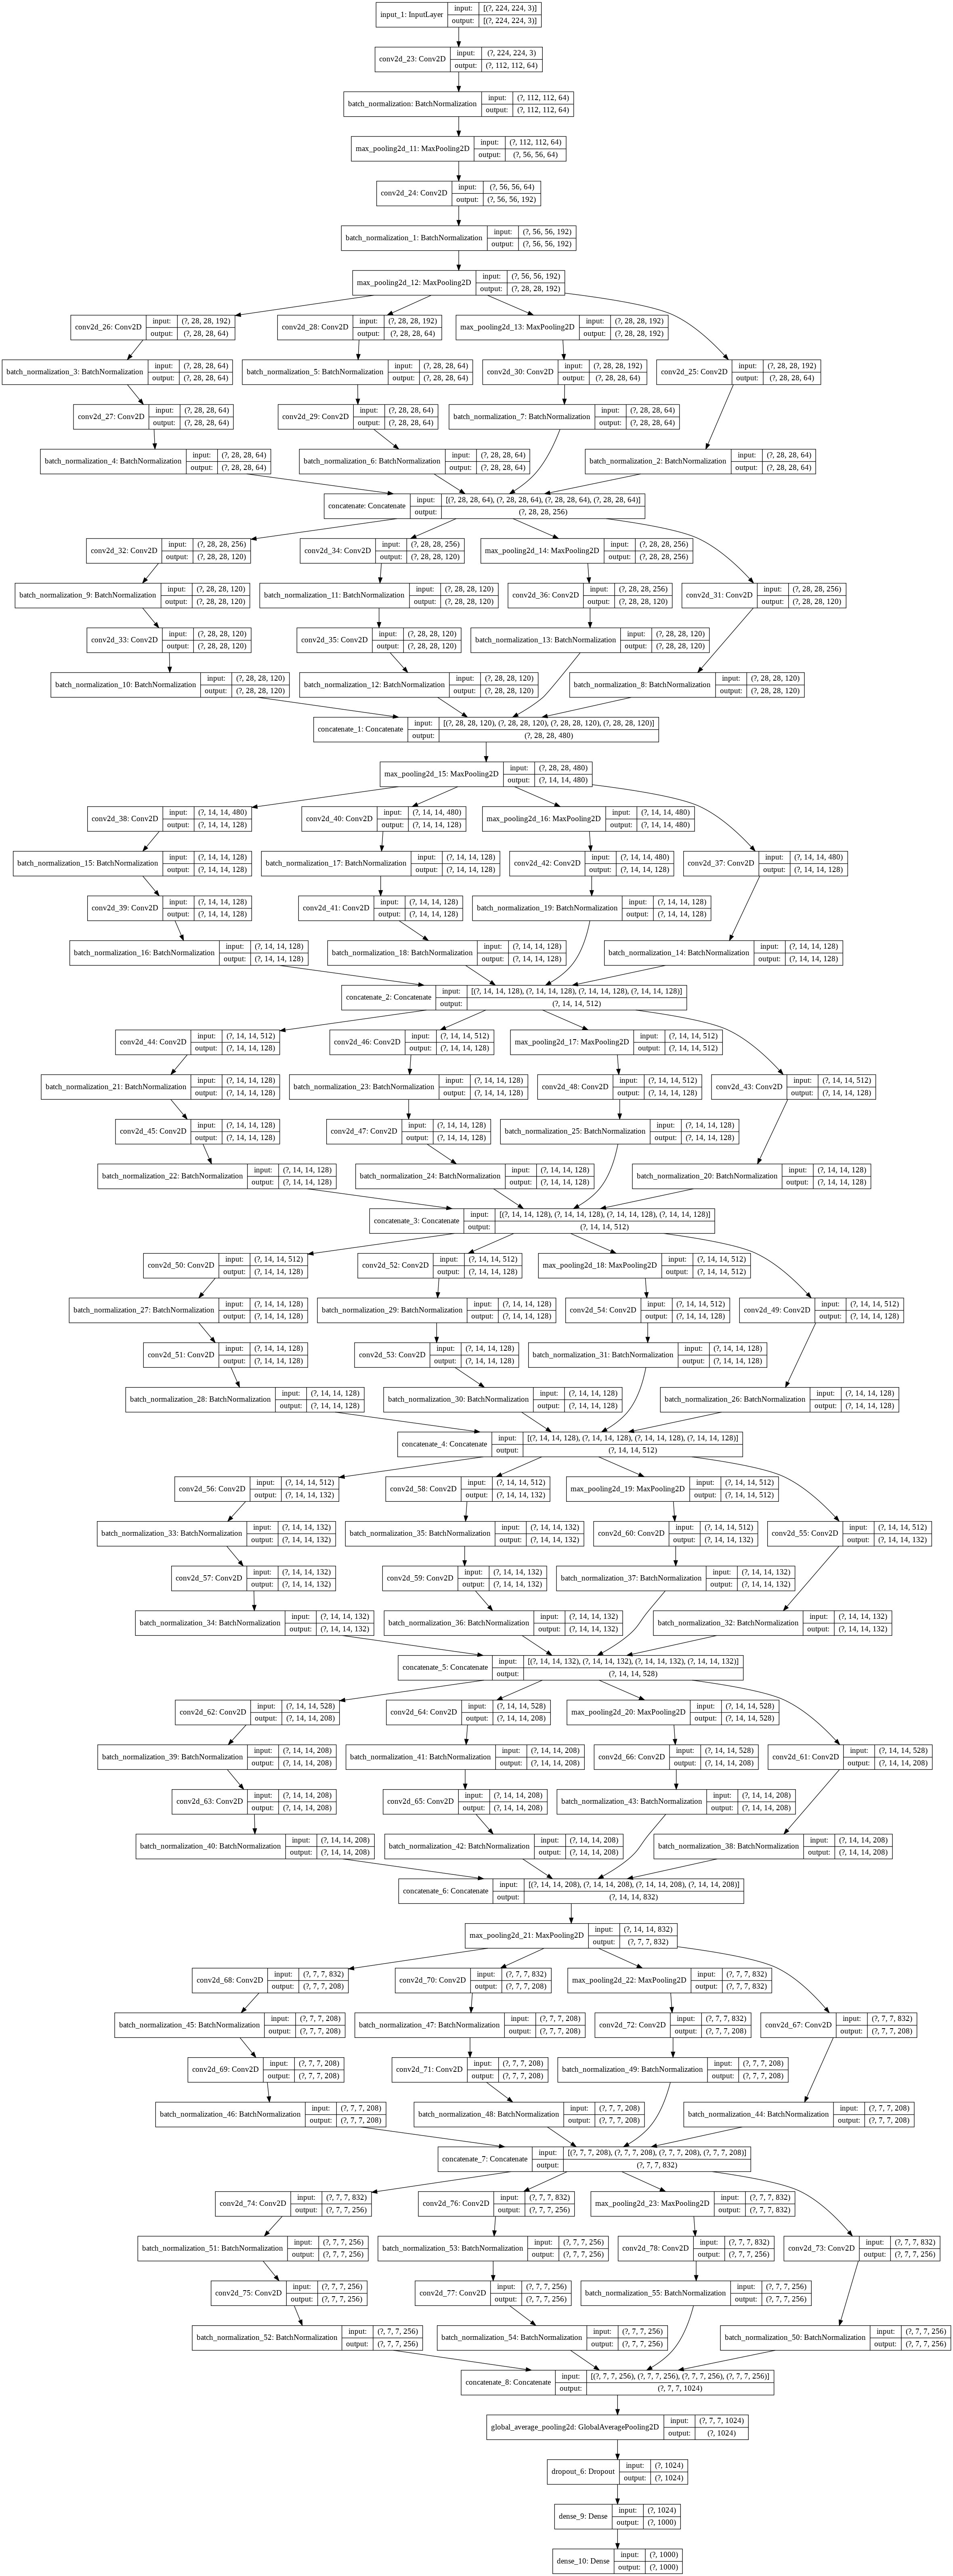

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
# ResNet50
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
# https://github.com/raghakot/keras-resnet/blob/master/README.md

In [ ]:
# model architecture only
model = tf.keras.applications.ResNet50(include_top=True, weights=None, pooling=None, classes=1000) 

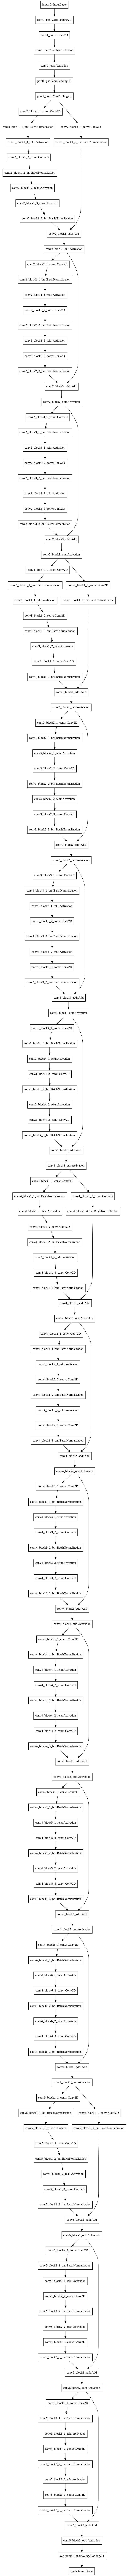

In [ ]:
plot_model(model)

In [ ]:
# model architecture + pre-trained weights on ImageNet
model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet', classes=1000)

In [ ]:
tf.keras.applications.ResNet50(include_top=True, weights='imagenet', classes=1000, )
tf.keras.applications.ResNet50(include_top=False, weights='imagenet')